## Manish Sidhenkiwar
LinkedIn: https://www.linkedin.com/in/msid02/

# DBSCAN Project  

## The Data


Source: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

Margarida G. M. S. Cardoso, margarida.cardoso '@' iscte.pt, ISCTE-IUL, Lisbon, Portugal


Data Set Information:

Provide all relevant information about your data set.


Attribute Information:

    1) FRESH: annual spending (m.u.) on fresh products (Continuous);
    2) MILK: annual spending (m.u.) on milk products (Continuous);
    3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
    4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
    5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
    6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
    7) CHANNEL: customers  Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
    8) REGION: customers  Region Lisnon, Oporto or Other (Nominal)
 

Relevant Papers:

Cardoso, Margarida G.M.S. (2013). Logical discriminant models â€“ Chapter 8 in Quantitative Modeling in Marketing and Management Edited by Luiz Moutinho and Kun-Huang Huarng. World Scientific. p. 223-253. ISBN 978-9814407717

Jean-Patrick Baudry, Margarida Cardoso, Gilles Celeux, Maria JosÃ© Amorim, Ana Sousa Ferreira (2012). Enhancing the selection of a model-based clustering with external qualitative variables. RESEARCH REPORT NÂ° 8124, October 2012, Project-Team SELECT. INRIA Saclay - ÃŽle-de-France, Projet select, UniversitÃ© Paris-Sud 11



-----

## DBSCAN and Clustering Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/wholesome_customers_data.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


## EDA

**TASK: Create a scatterplot showing the relation between MILK and GROCERY spending, colored by Channel column.**

In [5]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

<AxesSubplot:xlabel='Milk', ylabel='Grocery'>

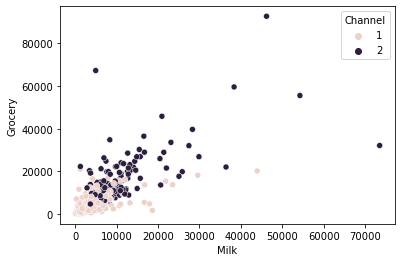

In [6]:
sns.scatterplot(data=df,y='Grocery',x='Milk',hue='Channel')

**TASK: Use seaborn to create a histogram of MILK spending, colored by Channel. Lets use seaborn to "stack" the channels, instead of have them overlap?**

<AxesSubplot:xlabel='Milk', ylabel='Count'>

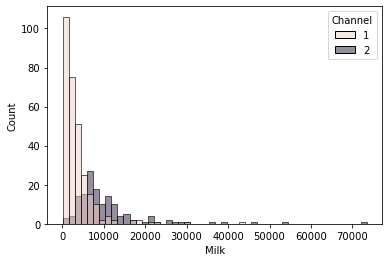

In [7]:
sns.histplot(data=df,x='Milk',hue='Channel')

<AxesSubplot:xlabel='Milk', ylabel='Count'>

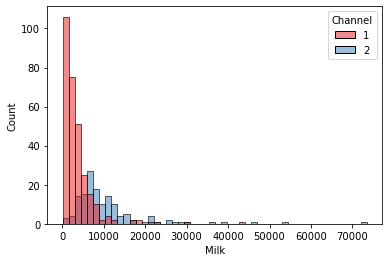

In [8]:
sns.histplot(data=df,x='Milk',hue='Channel',palette='Set1')

<AxesSubplot:xlabel='Milk', ylabel='Count'>

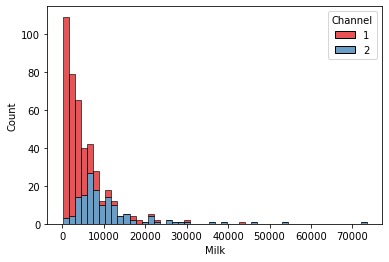

In [9]:
#lets stack it up instead of above overlap over each other.
sns.histplot(data=df,x='Milk',hue='Channel',palette='Set1',multiple='stack')

**TASK: Create an annotated clustermap of the correlations between spending on different cateogires.**

Correlation Between Spending Categories


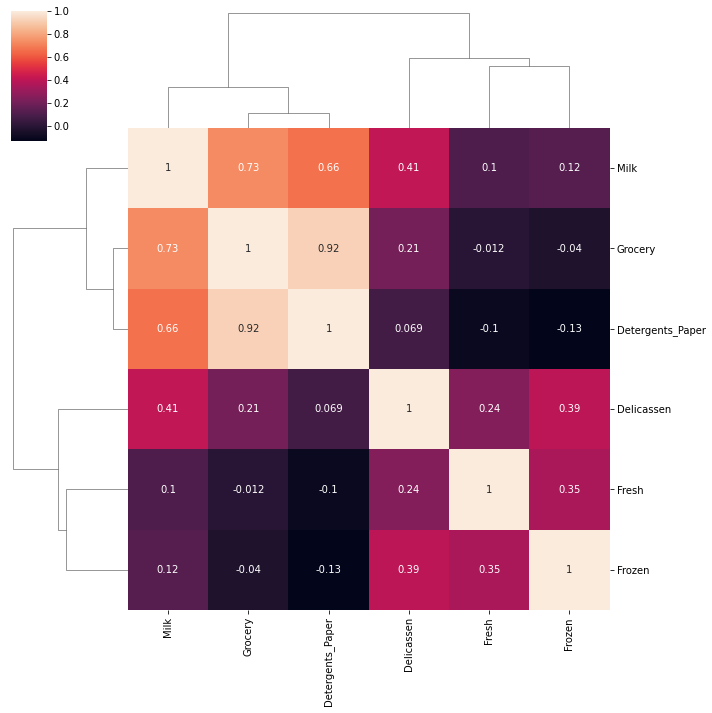

In [10]:
# To remove diagonals use row cluster/col cluster = False
sns.clustermap(data=df[['Milk','Grocery','Detergents_Paper','Delicassen','Fresh','Frozen']].corr(),annot=True)
print('Correlation Between Spending Categories')

Correlation Between Spending Categories


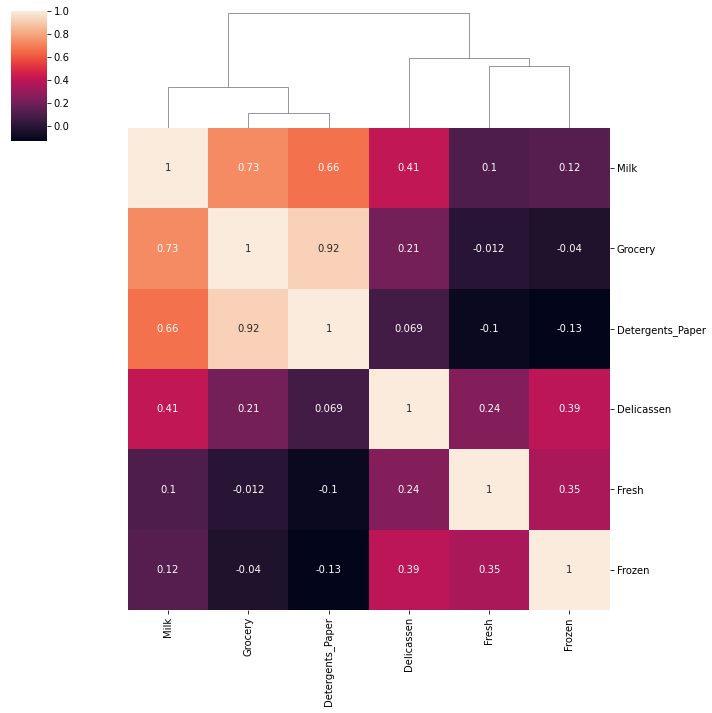

In [11]:
# To remove diagonals use row cluster/col cluster = False
sns.clustermap(data=df[['Milk','Grocery','Detergents_Paper','Delicassen','Fresh','Frozen']].corr(),annot=True,row_cluster=False)
print('Correlation Between Spending Categories')

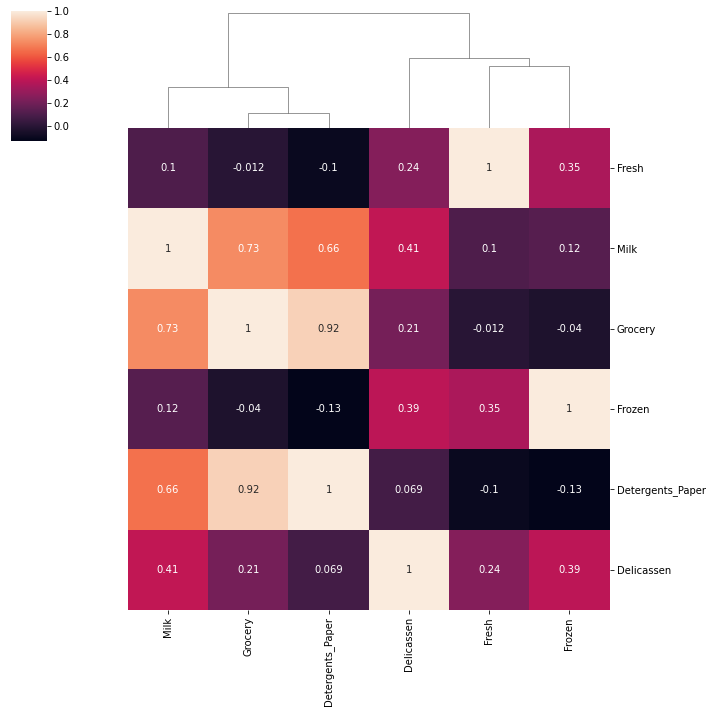

In [12]:
# method2
sns.clustermap(df.drop(['Region','Channel'],axis=1).corr(),annot=True,row_cluster=False)

**TASK: Create a PairPlot of the dataframe, colored by Region.**

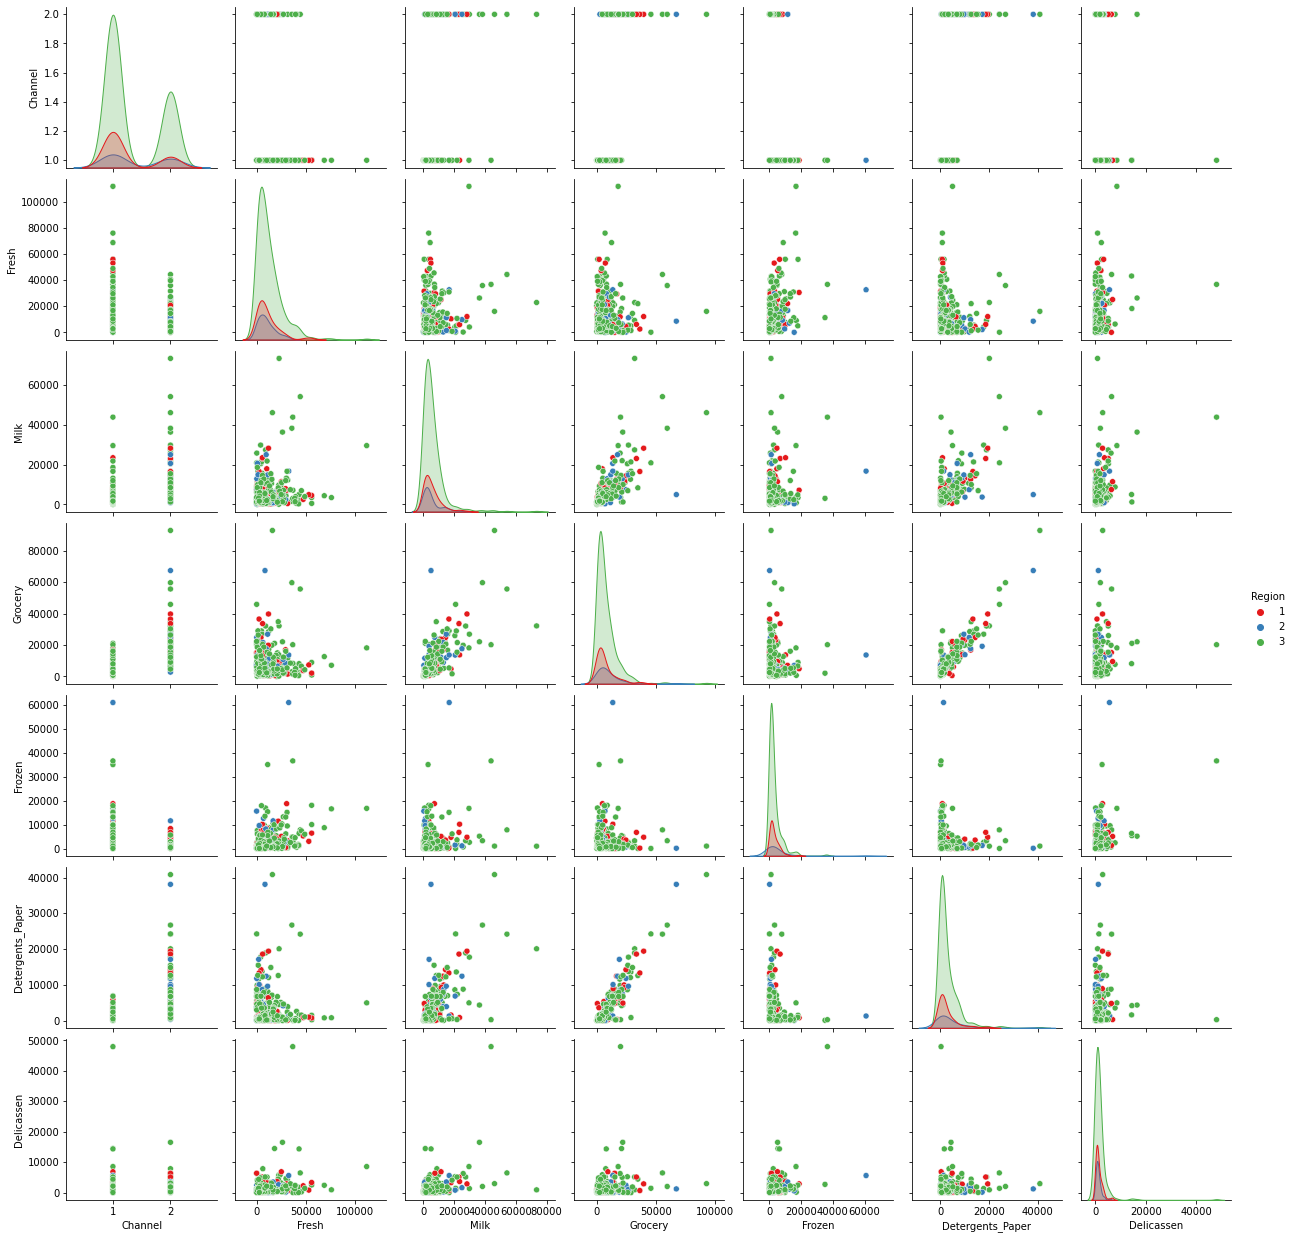

In [13]:
sns.pairplot(data=df,hue='Region',palette='Set1')

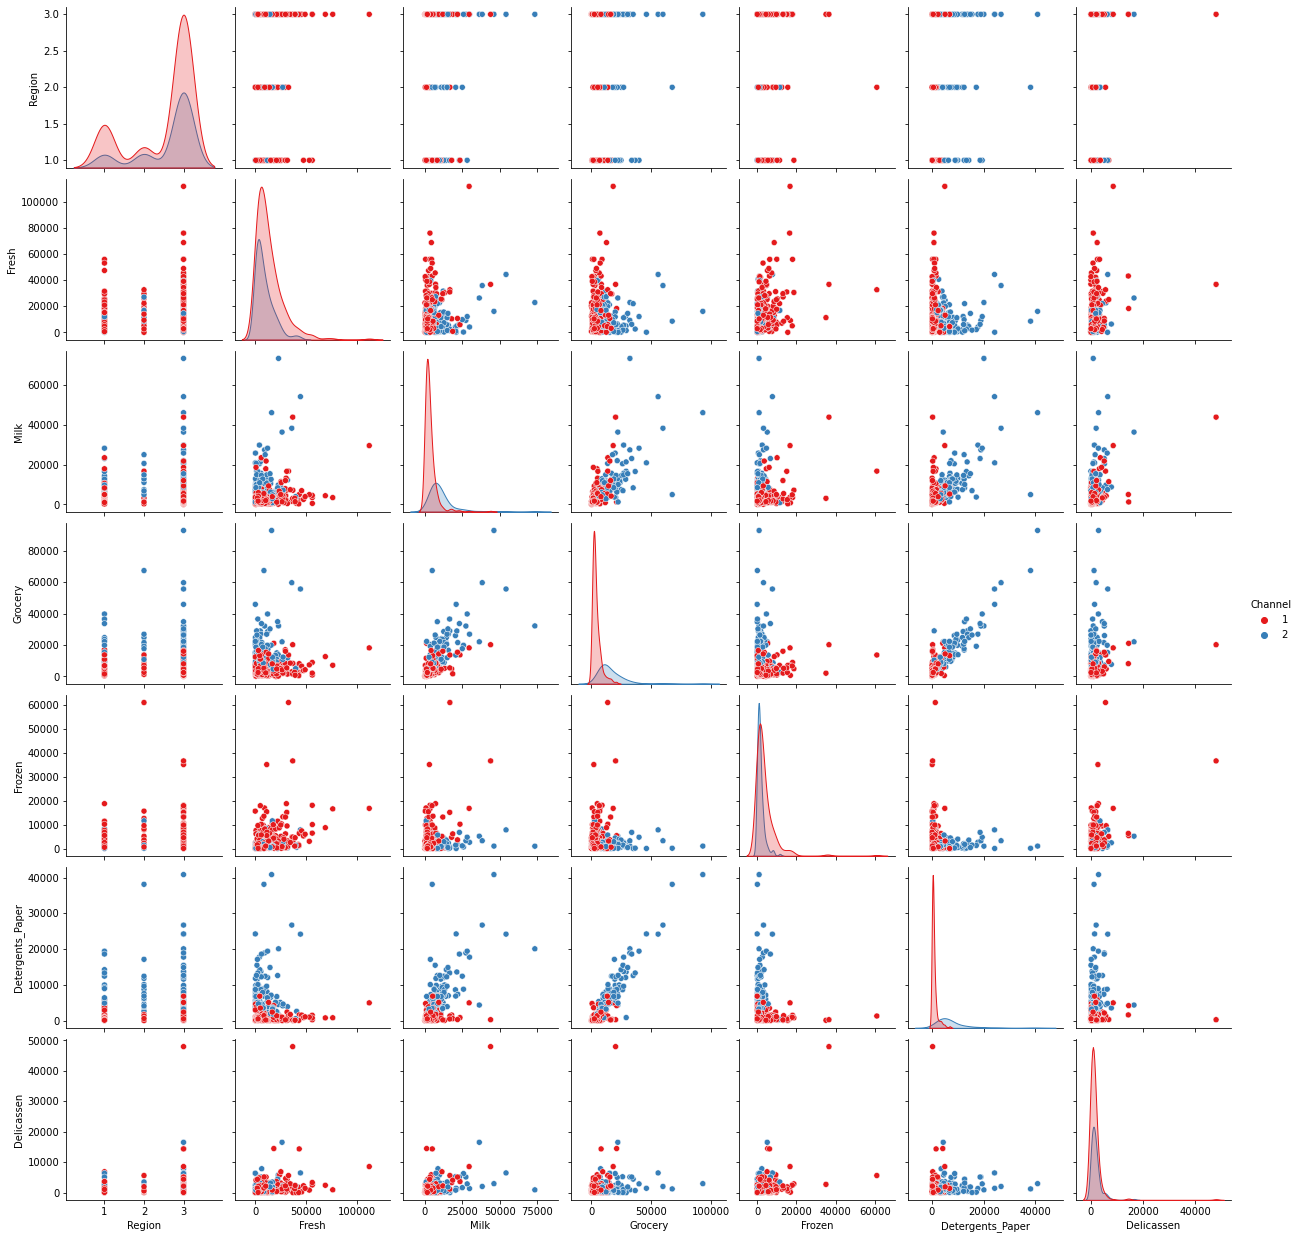

In [14]:
#lets see for hue=Channel
sns.pairplot(data=df,hue='Channel',palette='Set1')

## DBSCAN

**TASK: Since the values of the features are in different orders of magnitude, let's scale the data. Use StandardScaler to scale the data.**

In [15]:
#If there's any distance matrix being used,scale the data.Also in doubt,simply scale.
# Since there are not much columns & all are in numeric,we can skip making dummies as well.

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler=StandardScaler()

In [18]:
scaled_X= scaler.fit_transform(df)

In [19]:
scaled_X

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

**TASK: Use DBSCAN and a for loop to create a variety of models testing different epsilon values. Set min_samples equal to 2 times the number of features as its good starting point. During the loop, keep track of and log the percentage of points that are outliers.**

    np.linspace(0.001,3,50)

In [20]:
from sklearn.cluster import DBSCAN

In [21]:
#Charting reasonable outlier values
outlier_percent= []

for eps in np.linspace(0.001,3,50):
    #create model
    dbscan= DBSCAN(eps=eps,min_samples=2*scaled_X.shape[1])
    #fit the model
    dbscan.fit(scaled_X)
    
    # log percentage of points that are outliers
    perc_outliers= 100* np.sum(dbscan.labels_ == -1)/len(dbscan.labels_)
    outlier_percent.append(perc_outliers)

**TASK: Create a line plot of the percentage of outlier points versus the epsilon value choice.**

Text(0.5, 0, 'Epsilon Value')

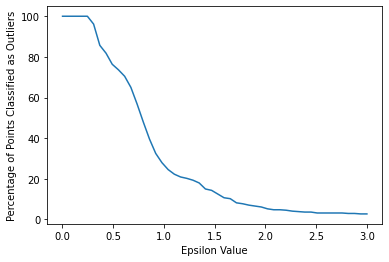

In [22]:
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

## DBSCAN with Chosen Epsilon

**TASK: Based on the plot created in the previous task, retrain a DBSCAN model with a reasonable epsilon value.**

In [23]:
#from above lineplot ,we can say dbscan is levelling quite well near about eps=2.0,so lets choose that to retrain our model.

In [24]:
dbscan= DBSCAN(eps=2,min_samples=scaled_X.shape[1])

In [25]:
dbscan.fit(scaled_X)

DBSCAN(eps=2, min_samples=8)

In [26]:
#new labels for our model
dbscan.labels_

array([ 0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,
        1,  0,  1,  0,  1,  1, -1,  0,  0,  1,  1,  0,  1,  1,  1,  1,  1,
        1,  0,  1,  0,  0,  1,  1,  1,  0,  0,  0,  0,  0, -1,  0,  0,  1,
        1,  0,  0,  1,  1,  0,  0,  1,  1,  0, -1,  0,  0,  1, -1,  1,  0,
        1,  1,  1, -1,  1,  0,  0,  1,  1,  0,  1,  1,  1,  0,  0,  1,  0,
       -1, -1, -1,  1,  1,  1,  1, -1, -1,  0,  1,  0,  1,  1,  1,  0,  0,
        0,  1,  1,  1,  0,  0,  0,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  0,  1, -1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  0,  0,  1,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  1,
        0,  0,  1,  0,  1,  0,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
        1,  0,  0,  1,  1,  1,  0,  1,  1,  1,  0,  1,  1,  0,  0,  1,  1,
        1,  0,  1,  0,  1,  0,  1, -1,  1,  1,  0,  1,  0,  1,  0,  1,  1,
        1,  1,  0,  1,  1

**TASK: Create a scatterplot of Milk vs Grocery, colored by the discovered labels of the DBSCAN model.**

<AxesSubplot:xlabel='Grocery', ylabel='Milk'>

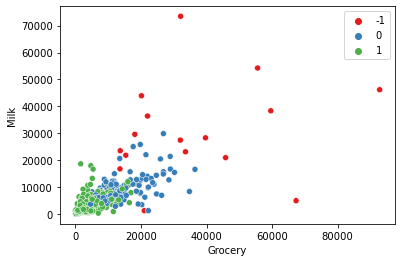

In [27]:
#Use palette carefully to see distinction between outliers.
sns.scatterplot(data=df,x='Grocery',y='Milk',hue=dbscan.labels_,palette='Set1')

**TASK: Create a scatterplot of Milk vs. Detergents Paper colored by the labels.**

<AxesSubplot:xlabel='Detergents_Paper', ylabel='Milk'>

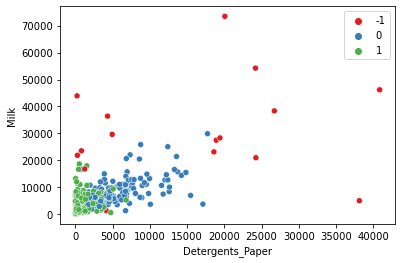

In [28]:
sns.scatterplot(data=df,x='Detergents_Paper',y='Milk',hue=dbscan.labels_,palette='Set1')

**TASK: Create a new column on the original dataframe called "Labels" consisting of the DBSCAN labels.**

In [29]:
df['labels']= dbscan.labels_

In [30]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


**TASK: Compare the statistical mean of the clusters and outliers for the spending amounts on the categories.**

In [31]:
# We are interested in categorical columns ,so drop channel & region

In [32]:
categories=df.drop(['Channel','Region'],axis=1)

In [33]:
#group by using our newly created label column which represents outliers & lets take mean.
categories_means= categories.groupby(by='labels').mean()

In [34]:
categories_means

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
labels,,,,,,
-1,28678.285714,24176.523810,28797.857143,11535.000000,11932.523810,7367.380952
0,8134.862595,8909.916031,14004.427481,1450.595420,6080.832061,1533.519084
1,12542.430556,3039.760417,3677.871528,3192.315972,766.267361,1094.920139


<AxesSubplot:ylabel='labels'>

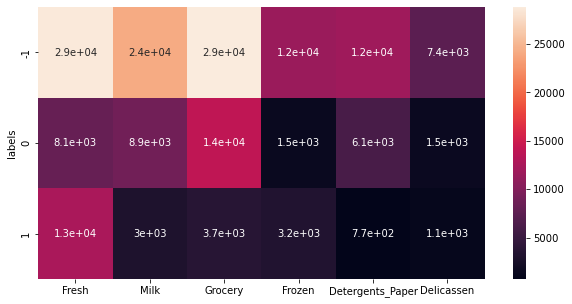

In [35]:
plt.figure(figsize=(10,5))
sns.heatmap(data=categories_means,annot=True)

<AxesSubplot:ylabel='labels'>

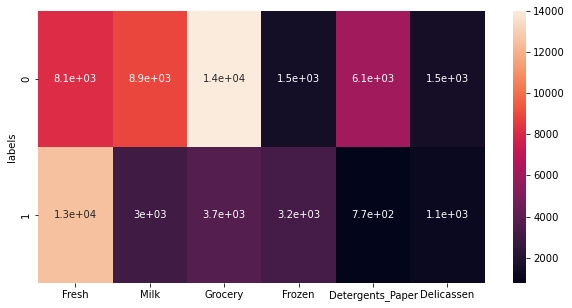

In [36]:
# lets see labels 0 & 1 only
plt.figure(figsize=(10,5))
sns.heatmap(data=categories_means.loc[[0,1]],annot=True)

In [37]:
# Fresh ,milk & grocery are giving more outliers as spending is much more there than in other categories.

**TASK: Normalize the dataframe from the previous task using MinMaxScaler so the spending means go from 0-1 and create a heatmap of the values.**

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler= MinMaxScaler()

In [40]:
scaled_categorical_data=scaler.fit_transform(categories_means)

In [41]:
scaled_means= pd.DataFrame(data=scaled_categorical_data,index=categories_means.index,columns=categories_means.columns)

In [42]:
scaled_means

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
labels,,,,,,
-1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0,0.000000,0.277723,0.411089,0.000000,0.475949,0.069925
1,0.214549,0.000000,0.000000,0.172714,0.000000,0.000000


<AxesSubplot:ylabel='labels'>

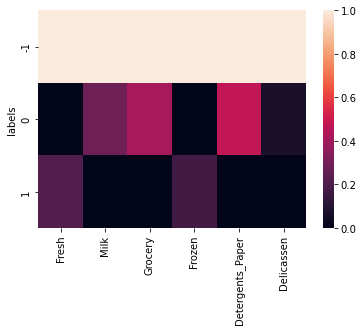

In [43]:
sns.heatmap(pd.DataFrame(data=scaled_categorical_data,index=categories_means.index,columns=categories_means.columns))

**TASK: Create another heatmap similar to the one above, but with the outliers removed**

<AxesSubplot:ylabel='labels'>

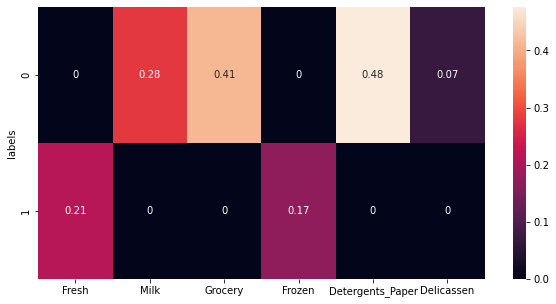

In [44]:
# lets see labels 0 & 1 for scaled means
plt.figure(figsize=(10,5))
sns.heatmap(data=scaled_means.loc[[0,1]],annot=True)

---

**From above heatmap,we can conclude that,Detergent paper & milk have most different spending in two cluster labels.**
### Also,we can say that Detergents Paper was the most significant difference.

----
----
### Thanks!